<a href="https://colab.research.google.com/github/tcbic/DS-Unit-2-Applied-Modeling/blob/master/Unit_2_Sprint_3_Module_1_Assignment_1(Caterpillar%20Kaggle%20Submission%201).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip

--2019-07-23 21:34:55--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 823789 (804K) [application/zip]
Saving to: ‘caterpillar-tube-pricing.zip’

caterpillar-tube-pr 100%[===================>] 804.48K  --.-KB/s    in 0.06s   

2019-07-23 21:34:55 (12.6 MB/s) - ‘caterpillar-tube-pricing.zip’ saved [823789/823789]



In [2]:
!unzip caterpillar-tube-pricing.zip

Archive:  caterpillar-tube-pricing.zip
  inflating: sample_submission.csv   
  inflating: data.zip                


In [3]:
!unzip data.zip

Archive:  data.zip
   creating: competition_data/
  inflating: competition_data/bill_of_materials.csv  
  inflating: competition_data/comp_adaptor.csv  
  inflating: competition_data/comp_boss.csv  
  inflating: competition_data/comp_elbow.csv  
  inflating: competition_data/comp_float.csv  
  inflating: competition_data/comp_hfl.csv  
  inflating: competition_data/comp_nut.csv  
  inflating: competition_data/comp_other.csv  
  inflating: competition_data/comp_sleeve.csv  
  inflating: competition_data/comp_straight.csv  
  inflating: competition_data/comp_tee.csv  
  inflating: competition_data/comp_threaded.csv  
  inflating: competition_data/components.csv  
  inflating: competition_data/specs.csv  
  inflating: competition_data/test_set.csv  
  inflating: competition_data/train_set.csv  
  inflating: competition_data/tube.csv  
  inflating: competition_data/tube_end_form.csv  
  inflating: competition_data/type_component.csv  
  inflating: competition_data/type_connection.csv  
  i

In [0]:
SOURCE = '../data/caterpillar/caterpillar-tube-pricing/competition_data/'

In [0]:
SOURCE = 'competition_data/'

In [0]:
import pandas as pd

materials = pd.read_csv(SOURCE + 'bill_of_materials.csv')

components = pd.read_csv(SOURCE + 'components.csv')

In [7]:
from glob import glob

for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    print(path, df.shape)

competition_data/type_end_form.csv (8, 2)
competition_data/comp_elbow.csv (178, 16)
competition_data/tube_end_form.csv (27, 2)
competition_data/type_connection.csv (14, 2)
competition_data/comp_adaptor.csv (25, 20)
competition_data/bill_of_materials.csv (21198, 17)
competition_data/comp_sleeve.csv (50, 10)
competition_data/comp_straight.csv (361, 12)
competition_data/comp_hfl.csv (6, 9)
competition_data/components.csv (2048, 3)
competition_data/comp_float.csv (16, 7)
competition_data/comp_threaded.csv (194, 32)
competition_data/test_set.csv (30235, 8)
competition_data/comp_nut.csv (65, 11)
competition_data/tube.csv (21198, 16)
competition_data/train_set.csv (30213, 8)
competition_data/specs.csv (21198, 11)
competition_data/comp_other.csv (1001, 3)
competition_data/type_component.csv (29, 2)
competition_data/comp_boss.csv (147, 15)
competition_data/comp_tee.csv (4, 14)


We are evaluating based on RMSLE (Root Mean Squared Logarithmic Error).

In [0]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

#Create a function for finding RMSLE.

def rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [0]:
#What kind of date ranges does our test set deal with?

#Are they overlapping date ranges and overlapping tube assemblies from train to test? If train is earlier dates and then test is later dates, then we
#probably want to do a time based split. That's telling us that the goal is to forecast out into the future using earlier information to forecast or predict later information. But if the
#test set has the same date ranges, then that is evidently not how this model is being used. We would then have to look at some different strategies for splitting.

In [0]:
train_and_val = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')

In [0]:
#Let's take a look at our data.
#We specifically want to take a close look at the date ranges here.

In [10]:
train_and_val.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561


In [11]:
test.head()

,id,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity
0,1,TA-00001,S-0066,2013-06-23,0,0,Yes,1
1,2,TA-00001,S-0066,2013-06-23,0,0,Yes,2
2,3,TA-00001,S-0066,2013-06-23,0,0,Yes,5
3,4,TA-00001,S-0066,2013-06-23,0,0,Yes,10
4,5,TA-00001,S-0066,2013-06-23,0,0,Yes,25


In [0]:
#We are going to convert quote_date to a datetime in each data frame.

train_and_val['quote_date'] = pd.to_datetime(train_and_val['quote_date'], infer_datetime_format=True)

test['quote_date'] = pd.to_datetime(test['quote_date'], infer_datetime_format=True)

In [13]:
train_and_val['quote_date'].describe()

count                   30213
unique                   1781
top       2013-10-01 00:00:00
freq                     2877
first     1982-09-22 00:00:00
last      2017-01-01 00:00:00
Name: quote_date, dtype: object

In [14]:
test['quote_date'].describe()

count                   30235
unique                   1778
top       2013-09-01 00:00:00
freq                     2992
first     1985-11-16 00:00:00
last      2017-01-01 00:00:00
Name: quote_date, dtype: object

In [0]:
#These are highly overlapping date ranges. With this, their goal isn't to forecast from earlier information to later information. 
#Instead their goal might be to use information about tube assemblies that you have seen before to make predictions for tube assemblies that are unknown.

In [15]:
#Does the test set have different tube assemblies?

train_and_val['tube_assembly_id'].nunique()

8855

In [16]:
test['tube_assembly_id'].nunique()

8856

In [17]:
train_and_val_tube_assemblies = train_and_val['tube_assembly_id'].unique()

test_tube_assemblies = test['tube_assembly_id'].unique()

len(train_and_val_tube_assemblies), len(test_tube_assemblies)

(8855, 8856)

In [18]:
#Show me the intersection.

set(train_and_val_tube_assemblies) & set(test_tube_assemblies)

set()

In [0]:
#We notice that each set has almost the exact same number. But, do they have overlap?

In [0]:
#From previous information, we know that there is no overlap.

In [0]:
#Make the validation set like the test set.

In [19]:
train_and_val_tube_assemblies

array(['TA-00002', 'TA-00004', 'TA-00005', ..., 'TA-21195', 'TA-21196',
       'TA-21197'], dtype=object)

In [0]:
from sklearn.model_selection import train_test_split

train_tube_assemblies, val_tube_assemblies = train_test_split(train_and_val_tube_assemblies, random_state=42)

In [21]:
len(train_tube_assemblies), len(val_tube_assemblies)

(6641, 2214)

In [22]:
#Verifying that there is no intersection.

set(train_tube_assemblies) & set(val_tube_assemblies)

#An empty set means that we've done it correctly.

set()

In [23]:
train = train_and_val[train_and_val.tube_assembly_id.isin(train_tube_assemblies)]

val = train_and_val[train_and_val.tube_assembly_id.isin(val_tube_assemblies)]

train.shape, val.shape, train_and_val.shape

((22628, 8), (7585, 8), (30213, 8))

In [24]:
len(train) + len(val) == len(train_and_val)

True

**Establishing a baseline**

In [25]:
#Numeric features of the train set.

train.describe()

,annual_usage,min_order_quantity,quantity,cost
count,22628.000000,22628.000000,22628.000000,22628.000000
mean,116.908830,2.130193,38.267677,13.450500
std,1678.532065,13.262875,71.313125,27.622252
min,0.000000,0.000000,1.000000,0.523027
25%,0.000000,0.000000,2.000000,3.855934
50%,0.000000,0.000000,10.000000,6.507236
75%,2.000000,0.000000,40.000000,13.451951
max,150000.000000,535.000000,2500.000000,1000.000000


In [26]:
#Non-numeric features of the train set.

train.describe(exclude='number')

,tube_assembly_id,supplier,quote_date,bracket_pricing
count,22628,22628,22628,22628
unique,6641,52,1510,2
top,TA-04750,S-0066,2013-10-01 00:00:00,Yes
freq,12,15391,2077,19699
first,NaN,NaN,1987-04-10 00:00:00,NaN
last,NaN,NaN,2017-01-01 00:00:00,NaN


In [0]:
import numpy as np

In [0]:
target = 'cost'

y_train = train[target]

y_val = val[target]

#We'll use the mean to establish a target baseline.

y_pred = np.full_like(y_val, fill_value=y_train.mean())

In [29]:
#Verify the length of y_pred.

len(y_pred) == len(y_val)

True

In [30]:
print('Validation RMSLE for Mean Baseline:', rmsle(y_val, y_pred))

#This is the error of our baseline. Now, we are looking to make a model as quickly as we can that produces an error lower than that.

#Overall, a lower RMSLE is better.

Validation RMSLE for Mean Baseline: 0.9418101276064408


In [31]:
from sklearn.metrics import r2_score

print('Validation R^2 for Mean Baseline:', r2_score(y_val, y_pred))

Validation R^2 for Mean Baseline: -4.701447715138585e-06


**Let's develop a first model that performs better than our basic baseline.**

In [32]:
train.cost.mean()

13.450499769517025

In [33]:
train.groupby('quantity').cost.mean()

quantity
1       26.602862
2       19.222738
3       37.130535
4       26.695014
5       12.671149
6       10.638119
7       31.482244
8       16.170021
9       21.015575
10       7.356611
11      23.711489
12      14.262210
13       7.798112
14       9.330717
15      13.173706
16      10.771868
17      13.403166
18      11.248039
19       7.092018
20       5.070719
21       7.277866
22       6.174626
24       9.232764
25       5.098735
26       4.847274
27       5.278957
28       5.888784
29       5.586375
30       8.083138
31       4.047340
          ...    
167     19.449375
170      7.603367
180      2.601225
185     13.746154
195      1.627505
200      3.792344
205      1.941877
210      3.741869
225      7.873227
240      2.573405
250      4.077934
253     11.945605
285      2.107410
290      1.620549
300      5.785755
325      3.994341
350      4.594571
400      4.321465
480      4.932591
500      3.597759
535      6.357005
550      1.414677
574      1.926576
666      2.871085
7

In [0]:
#We'll start with using just the quantity feature.

In [0]:
#We've already defined target above.

features = ['quantity']
X_train = train[features]
X_val = val[features]

In [35]:
#Because we are projecting how many dollars(continuous variable), this is a regression problem.

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

model.fit(X_train, y_train)

r2 = model.score(X_val, y_val)

print('Validation R^2:', r2)

Validation R^2: 0.08879518736792147


In [36]:
y_pred = model.predict(X_val)

print(f'Validation RMSLE for Random Forest with {features}:')
print(rmsle(y_val, y_pred))

Validation RMSLE for Random Forest with ['quantity']:
0.6908805822519186


In [0]:
#Before we were off by .94 log dollars on average, and now we are off by only .69.

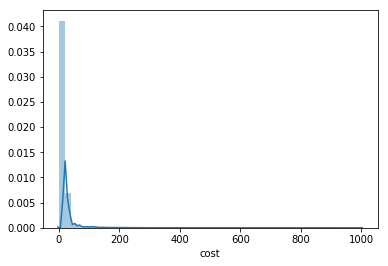

In [37]:
#One way we can get a better error here is by log transforming the regression target with our right skewed distribution.

#What does our distribution look like?

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(y_train);

In [38]:
#Use numpy for exponents and log functions.

#Example

2 ** 3

8

In [39]:
#We can see that this undoes the above operation.

np.log2(8)

3.0

**Let's go ahead and apply this to our training labels.**

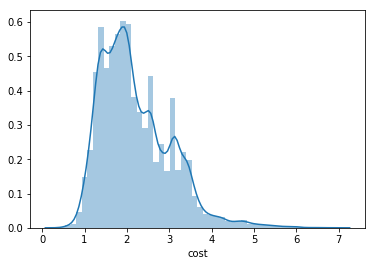

In [40]:
y_train_log = np.log1p(y_train)

#Let's go ahead and plot this.

sns.distplot(y_train_log);

#It's not a perfect bell curve by any means, but it will certainly make life easier for us.

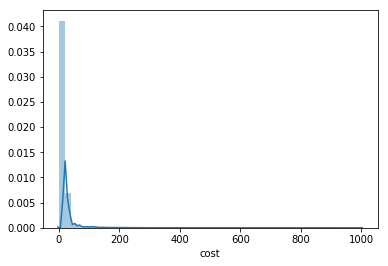

In [41]:
#We've taken the log and now we are going to exponentiate it. So, we are transforming it again. This takes us back to where we started.

y_train_log_exp = np.expm1(y_train_log)

#And the plot for visual verification...

sns.distplot(y_train_log_exp);

In [42]:
#Let's refit our model with our log transformed target.

model.fit(X_train, y_train_log)   #Training the model on log dollars.

y_pred_log = model.predict(X_val) #Generating predictions in log dollars.

#Converting back to the original units...

y_pred = np.expm1(y_pred_log)

rmsle(y_val, y_pred)

0.622925465880199

In [0]:
#We observe a lower error.

**RMSLE with original targets = RMSE with log-transformed targets**

In [0]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [44]:
#Log transform of the validation targets

y_val_log = np.log1p(y_val)

rmse(y_val_log, y_pred_log ) #Keeping in the log dollar unit

0.622925465880199

**Let's select some more features to use from our data.**

In [45]:
!pip install category_encoders

     |████████████████████████████████| 92kB 3.5MB/s 


In [46]:
#We'll remind ourselves of what features we have available to us...

train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983
10,TA-00004,S-0066,2013-07-07,0,0,Yes,5,6.668596
11,TA-00004,S-0066,2013-07-07,0,0,Yes,10,4.754539
12,TA-00004,S-0066,2013-07-07,0,0,Yes,25,3.608331


In [0]:
#We are going to engineer some features off of the quote date.

#Let's go ahead and define a wrangle function to do that...

def wrangle(X):
  X = X.copy()
  
  #Engineer date features
  
  X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
  X['quote_date_year'] = X['quote_date'].dt.year
  X['quote_date_month'] = X['quote_date'].dt.month
  X = X.drop(columns='quote_date')
  
  #Drop tube_assembly_id because our goal is to predict unknown assemblies.
  
  X = X.drop(columns='tube_assembly_id')
  
  return X

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [48]:
features = train_wrangled.columns.drop(target)

print('Features:', features.tolist())

#These are the features we'll be using that are already conveniently available to us.

Features: ['supplier', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'quote_date_year', 'quote_date_month']


In [0]:
X_train = train_wrangled[features]
X_val = val_wrangled[features]

In [50]:
#Let's create a pipeline.

import category_encoders as ce
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(ce.OrdinalEncoder(), RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val) #Again, these are in the log dollars units.

rmse(y_val_log, y_pred_log)

#We observe an even lower error.

0.3950096664322286

In [51]:
#Equivalent when converting back from log dollars to regular dollars.

y_pred = np.expm1(y_pred_log)
rmsle(y_val, y_pred)

0.3950096664322286

**Looking at our feature importances.**

In [52]:
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

importances.sort_values()

#quantity in this simple model is associated with more feature importance than the other features included in our model.

bracket_pricing       0.006545
min_order_quantity    0.045384
quote_date_month      0.060107
quote_date_year       0.087693
supplier              0.100287
annual_usage          0.174479
quantity              0.525504
dtype: float64

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


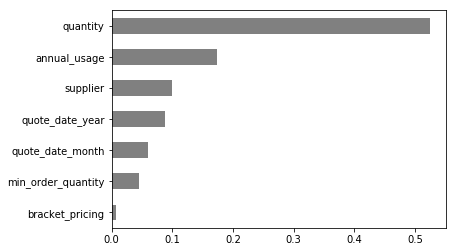

In [53]:
#Let's plot this...

importances.sort_values().plot.barh(colors='grey');

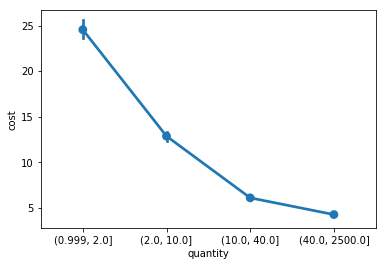

In [54]:
#To better understand the relationship between quantity and the target becuase quantity is such an important feature...

quantity_quartiles = pd.qcut(train_wrangled['quantity'], q=4)

sns.pointplot(x=quantity_quartiles, y=train_wrangled['cost']);

#As quantity increases, the price drops. Notice that it is not linear. It's monotonically decreasing as we'd expect. At first it drops faster, and then the rate of change slows down.

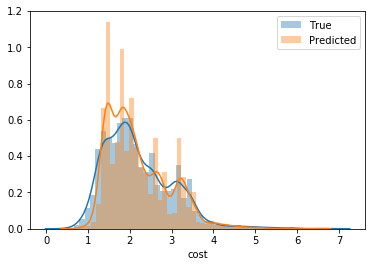

In [55]:
sns.distplot(y_val_log, label='True')
sns.distplot(y_pred_log, label='Predicted')
plt.legend();

**Feature engineering with relational data**

In [56]:
for path in glob('competition_data/*.csv'):
  df = pd.read_csv(path)
  shared_columns = set(df.columns) & set(train.columns)
  if shared_columns:
    print(path, df.shape)
    print(df.columns.tolist(), '\n')
    
    #Try to see what columns each of these files might have in common with the training set.

competition_data/bill_of_materials.csv (21198, 17)
['tube_assembly_id', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8'] 

competition_data/test_set.csv (30235, 8)
['id', 'tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity'] 

competition_data/tube.csv (21198, 16)
['tube_assembly_id', 'material_id', 'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a', 'end_x', 'num_boss', 'num_bracket', 'other'] 

competition_data/train_set.csv (30213, 8)
['tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'cost'] 

competition_data/specs.csv (21198, 11)
['tube_assembly_id', 'spec1', 'spec2', 'spec3', 'spec4', 'spec

In [57]:
train.columns

Index(['tube_assembly_id', 'supplier', 'quote_date', 'annual_usage',
       'min_order_quantity', 'bracket_pricing', 'quantity', 'cost'],
      dtype='object')

In [0]:
#We can merge on the columns our data frames have in common.

In [0]:
tube = pd.read_csv('competition_data/tube.csv')

In [59]:
#Numeric features

tube.describe()

,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other
count,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000
mean,23.687764,1.578402,100.312844,3.748137,49.350767,0.044485,0.006746,0.022644
std,25.396277,0.745749,70.542771,2.265405,196.468480,0.260737,0.100015,0.199676
min,3.180000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.520000,0.890000,48.000000,2.000000,19.050000,0.000000,0.000000,0.000000
50%,15.880000,1.650000,86.000000,3.000000,38.100000,0.000000,0.000000,0.000000
75%,25.400000,1.650000,135.000000,5.000000,50.800000,0.000000,0.000000,0.000000
max,203.200000,7.900000,1333.000000,17.000000,9999.000000,5.000000,5.000000,8.000000


In [60]:
#Non-numeric features

tube.describe(exclude='number')

,tube_assembly_id,material_id,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x
count,21198,20919,21198,21198,21198,21198,21198,21198
unique,21198,19,2,2,2,2,25,27
top,TA-03368,SP-0029,N,N,N,N,EF-003,EF-003
freq,1,11488,20118,18015,20377,18493,11388,10863


In [0]:
#We are going to use the wrangle function we created above and redefine it.

def wrangle(X):
  X = X.copy()
  
  #Engineer date features
  
  X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
  X['quote_date_year'] = X['quote_date'].dt.year
  X['quote_date_month'] = X['quote_date'].dt.month
  X = X.drop(columns='quote_date')
  
  #Merge tube data
  
  tube = pd.read_csv('competition_data/tube.csv')
  X = X.merge(tube, how='left')
  
  #Drop tube_assembly_id because our goal is to predict unknown assemblies.
  
  X = X.drop(columns='tube_assembly_id')
  
  return X

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [62]:
train_wrangled.shape, val_wrangled.shape

((22628, 23), (7585, 23))

In [63]:
train_wrangled.head()

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,quote_date_year,quote_date_month,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,S-0066,0,0,Yes,1,21.972702,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
1,S-0066,0,0,Yes,2,12.407983,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,S-0066,0,0,Yes,5,6.668596,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,S-0066,0,0,Yes,10,4.754539,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,S-0066,0,0,Yes,25,3.608331,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0


In [64]:
#Let's train our model.

X_train = train_wrangled.drop(columns=target)
X_val = val_wrangled.drop(columns=target)

pipeline = make_pipeline(ce.OrdinalEncoder(), RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)

rmse(y_val_log, y_pred_log)

#We observe that our error has dropped even further still.

0.3071425826783341

In [65]:
#Before generating predictions to submit to Kaggle, we need to wrangle the test set.

test_wrangled = wrangle(test)
X_test = test_wrangled.drop(columns='id')
all(X_test.columns == X_train.columns)

#We verify that all of the columns in X_test are the same as the columns we trained on.

True

In [0]:
#Make predictions for the test set.

y_pred_log = pipeline.predict(X_test) #Remember that these predictions are in log dollars, and Kaggle expects that the predictions will be in the original units(dollars).
y_pred = np.expm1(y_pred_log) #This transforms log dollars to dollars.

**Now use at least one more file and then to submit those results to Kaggle!**

In [0]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # Merge tube data
    tube = pd.read_csv(SOURCE + 'tube.csv')
    X = X.merge(tube, how='left')
    
    # Engineer features from bill_of_materials
    materials = pd.read_csv(SOURCE + 'bill_of_materials.csv')
    
    materials['components_total'] = (materials['quantity_1'].fillna(0) + 
                                     materials['quantity_2'].fillna(0) + 
                                     materials['quantity_3'].fillna(0) + 
                                     materials['quantity_4'].fillna(0) + 
                                     materials['quantity_5'].fillna(0) + 
                                     materials['quantity_6'].fillna(0) + 
                                     materials['quantity_7'].fillna(0) + 
                                     materials['quantity_8'].fillna(0))

    materials['components_distinct'] = (materials['component_id_1'].notnull().astype(int) + 
                                        materials['component_id_2'].notnull().astype(int) + 
                                        materials['component_id_3'].notnull().astype(int) + 
                                        materials['component_id_4'].notnull().astype(int) + 
                                        materials['component_id_5'].notnull().astype(int) + 
                                        materials['component_id_6'].notnull().astype(int) + 
                                        materials['component_id_7'].notnull().astype(int) + 
                                        materials['component_id_8'].notnull().astype(int))
    
    # Merge selected features from bill_of_materials
    # Just use the first component_id, ignore the others for now!
    features = ['tube_assembly_id', 'component_id_1', 'components_total', 'components_distinct']
    X = X.merge(materials[features], how='left')
    
    # Get component_type_id (has lower cardinality than component_id)
    components = pd.read_csv(SOURCE + 'components.csv')
    components = components.rename(columns={'component_id': 'component_id_1'})
    features = ['component_id_1', 'component_type_id']
    X = X.merge(components[features], how='left')
    
    # Count the number of specs for the tube assembly
    specs = pd.read_csv(SOURCE + 'specs.csv')
    specs['specs_total'] = specs.drop(columns=['tube_assembly_id']).count(axis=1)
    features = ['tube_assembly_id', 'specs_total', 'spec1']
    X = X.merge(specs[features], how='left')
    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns='tube_assembly_id')
    
    return X


# Read data
trainval = pd.read_csv(SOURCE + 'train_set.csv')
test = pd.read_csv(SOURCE + 'test_set.csv')

# Split into train & validation sets
# All rows for a given tube_assembly_id should go in either train or validation
trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=42)
train = trainval[trainval.tube_assembly_id.isin(train_tube_assemblies)]
val = trainval[trainval.tube_assembly_id.isin(val_tube_assemblies)]

# Wrangle train, validation, and test sets
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

# Arrange X matrix and y vector (log-transformed)
target = 'cost'
X_train = train.drop(columns=target)
X_val = val.drop(columns=target)
X_test = test.drop(columns='id')
y_train = train[target]
y_val = val[target]
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [69]:
# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

# Predict
def generate_submission(estimator, X_test, filename):
    y_pred_log = estimator.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Convert from log-dollars to dollars
    submission = pd.read_csv(SOURCE + '../sample_submission.csv')
    submission['cost'] = y_pred
    submission.to_csv(filename, index=False)
    
generate_submission(pipeline, X_test, 'submission-02.csv')

Validation Error 0.2958563668935705


In [0]:
from google.colab import files
files.download('submission-02.csv')